<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="https://raw.githubusercontent.com/DataForScience/Networks/master/data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0" width=150px> </div>
    <div style="float: left; margin-left: 10px;"> <h1>Causal Inference In Statistics - A Primer</h1>
        <h1>2.3 Colliders</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
    <div style="float: right; margin-right:10px;"> <p><a href="https://amzn.to/3gsFlkO" target=_blank><img src='data/causality.jpeg' width='100px'>
        <!--Amazon Affiliate Link--></a></p></div>
</div>

In [1]:
from collections import Counter
from pprint import pprint

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt 
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from CausalModel import CausalModel

import watermark

%load_ext watermark
%matplotlib inline

We start by print out the versions of the libraries we're using for future reference

In [2]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.13.2
IPython version      : 9.2.0

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 9, GenuineIntel
CPU cores   : 8
Architecture: 64bit

Git hash: f7b1abb57541776dc786174deb102ca4ab864df6

watermark : 2.5.0
pandas    : 2.2.3
matplotlib: 3.10.0
numpy     : 2.2.4



Load default figure style

In [3]:
plt.style.use('./d4sci.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Colliders

In [4]:
G = CausalModel()
G.add_causation('Ux', 'X')
G.add_causation('Uy', 'Y')
G.add_causation('Uz', 'Z')
G.add_causation('X', 'Z')
G.add_causation('Y', 'Z')

G.pos = {'X': (-1, 0), 'Y': (1, 0), 'Z':(0, -1), 'Ux':(-1, 1), 'Uy':(1, 1), 'Uz': (0, 0)}

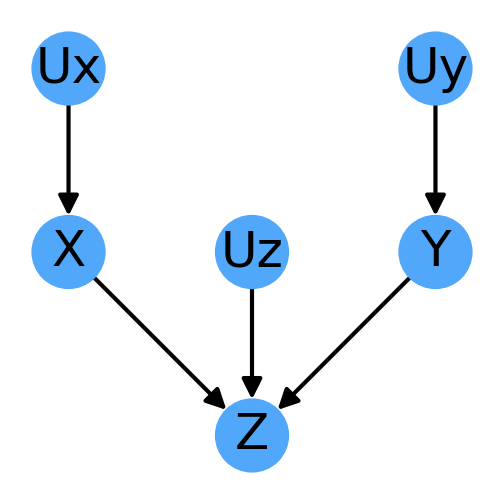

In [5]:
fig, ax = plt.subplots(1, figsize=(2.2, 2.2))
G.plot(ax=ax)

In [6]:
G.save_model('dags/Primer.Fig.2.3.dot')

### Conditioning

Text(8, 10, '$Z=X+Y$')

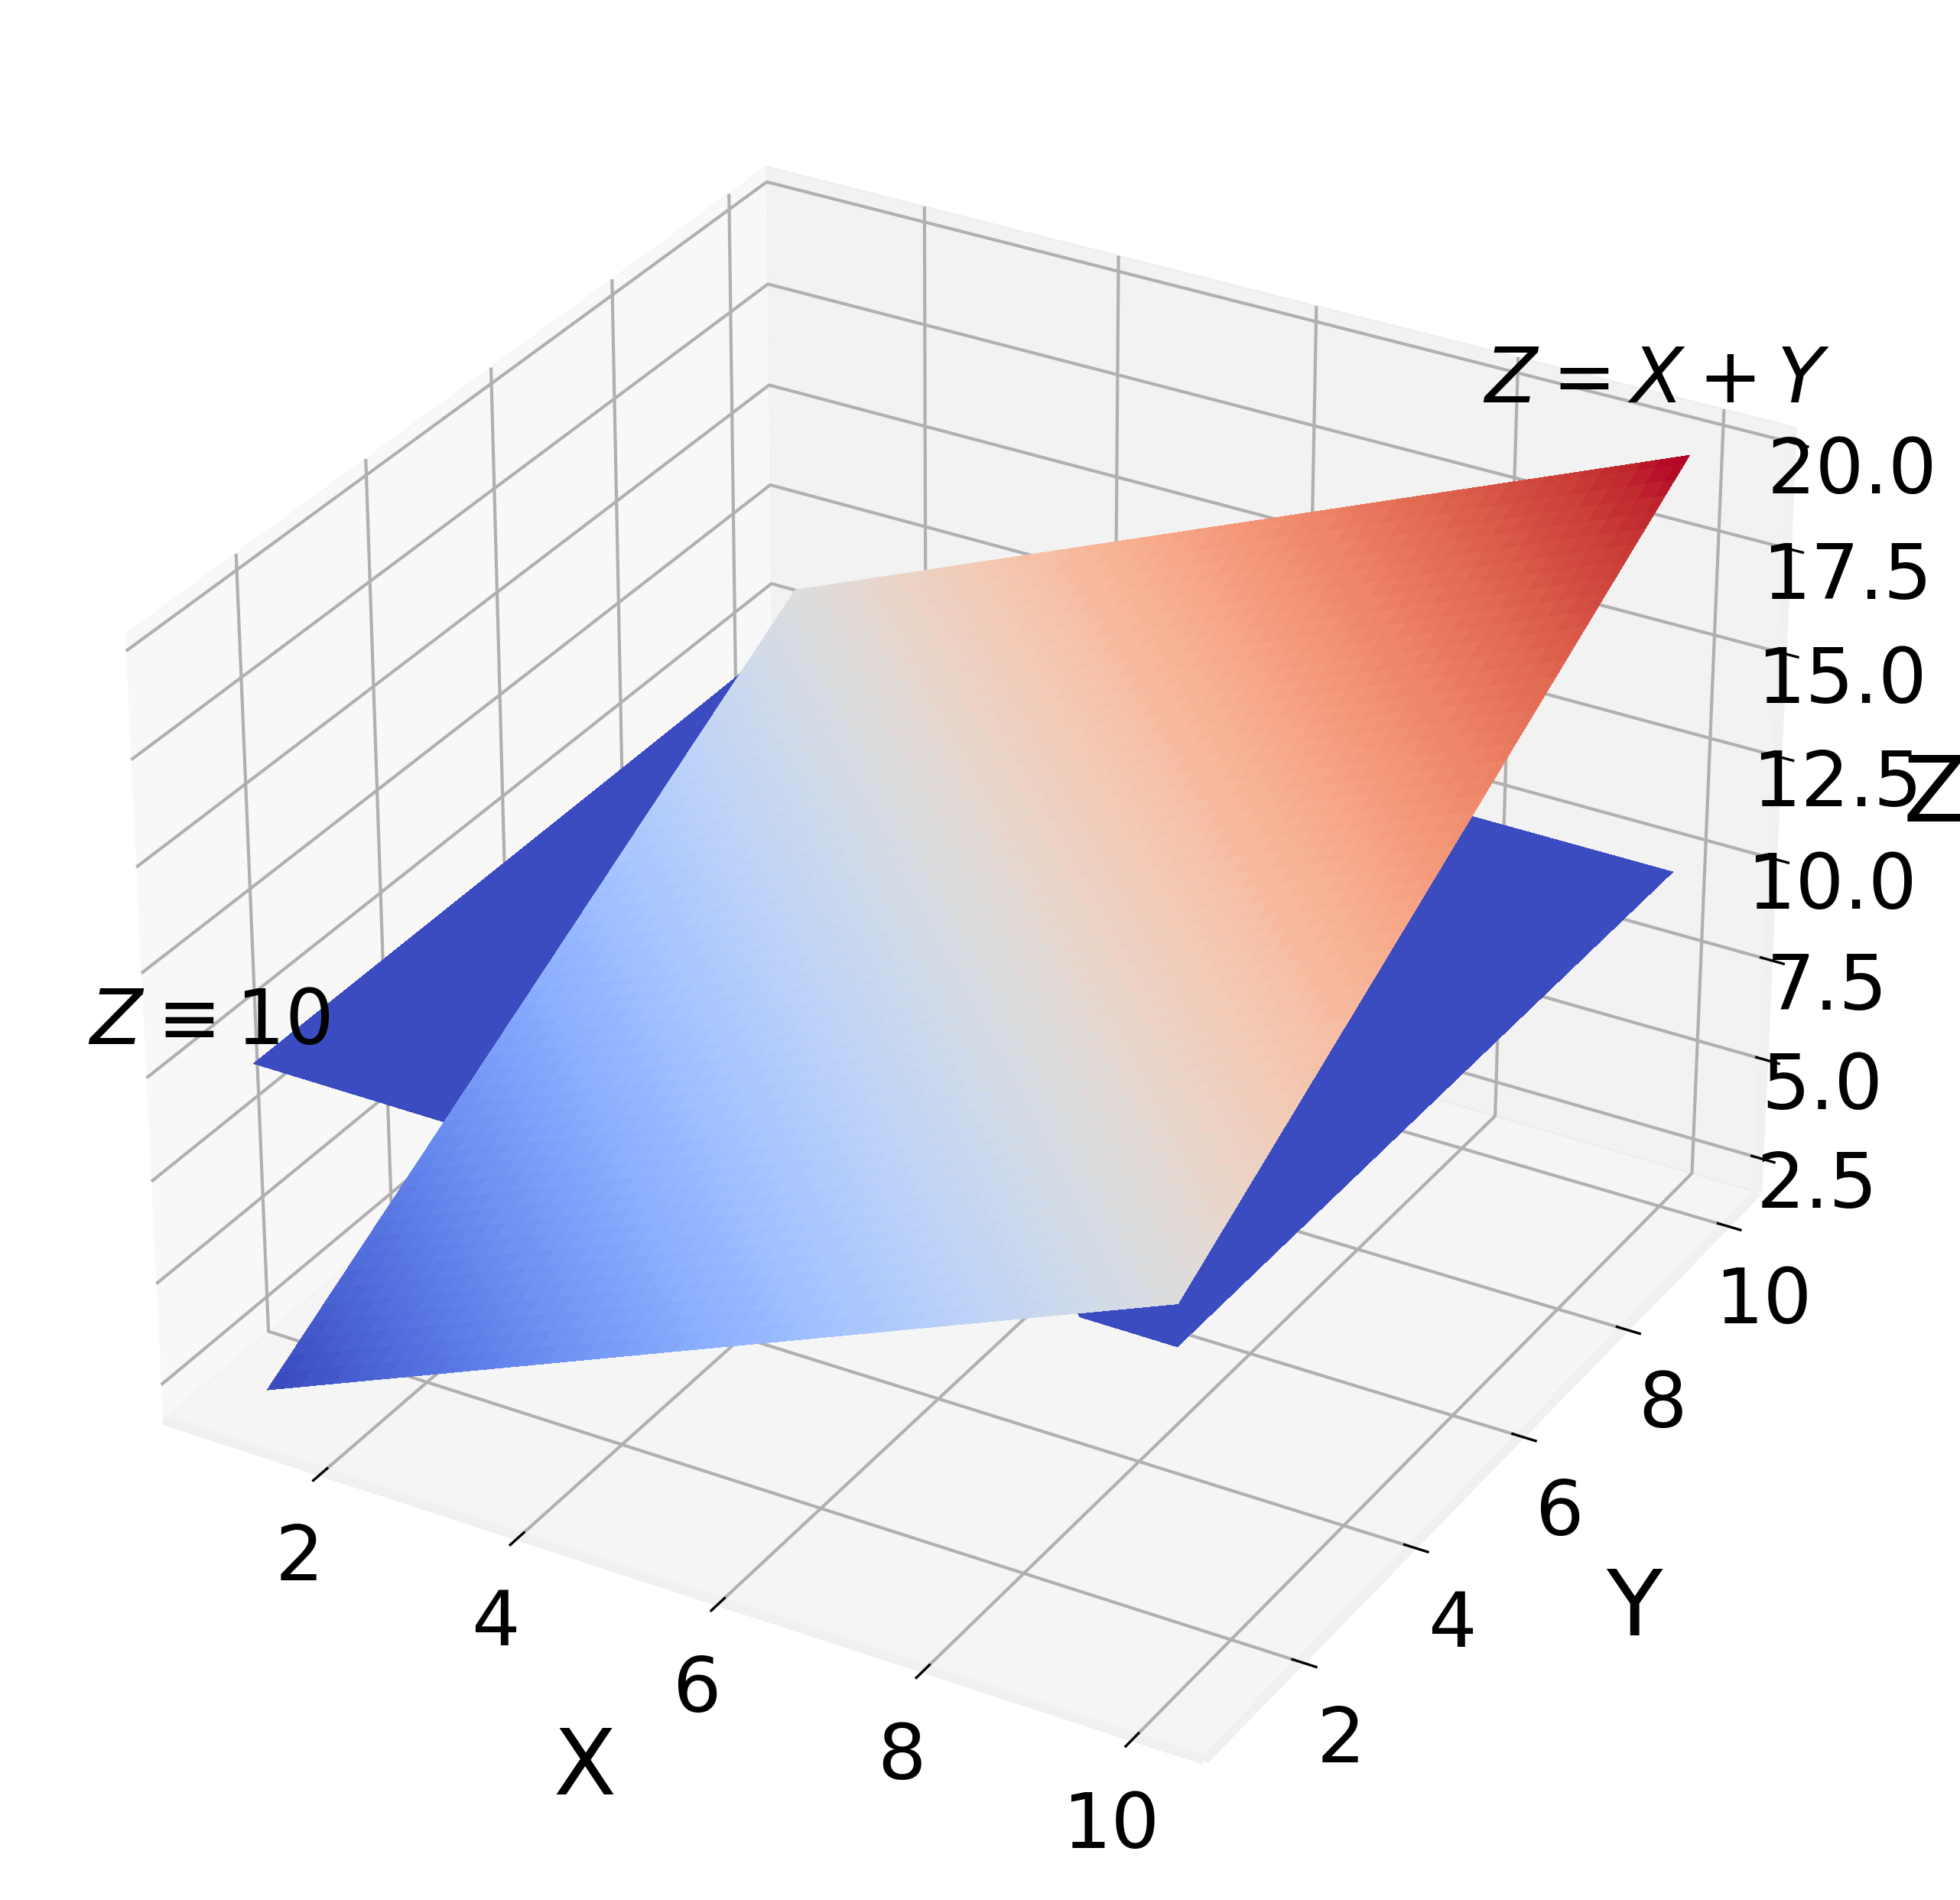

In [9]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
X = np.linspace(1, 10, 100)
Y = np.linspace(1, 10, 100)
X, Y = np.meshgrid(X, Y)
Z = X+Y
Z10 = Z*0+10

# Workaround for how matploltib works in 3D. We plot both sides of the surface separately.
X2 = np.linspace(1, 10, 100)
Y2 = np.linspace(1, 10, 100)
X2, Y2 = np.meshgrid(X2, Y2)
Z102 = Z*0+10

X2[Z<=10] = np.nan
Y2[Z<=10] = np.nan
Z102[Z<=10] = np.nan

ax.plot_surface(X2, Y2, Z102, cmap=cm.coolwarm, antialiased=False)
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, antialiased=False)

X3 = np.linspace(1, 10, 100)
Y3 = np.linspace(1, 10, 100)
X3, Y3 = np.meshgrid(X3, Y3)
Z103 = Z*0+10

X3[Z>10] = np.nan
Y3[Z>10] = np.nan
Z103[Z>10] = np.nan
ax.plot_surface(X3, Y3, Z103, cmap=cm.coolwarm, antialiased=False)

ax.set_xlabel('X', labelpad=20)
ax.set_ylabel('Y', labelpad=20)
ax.set_zlabel('Z', labelpad=10)

ax.text(0, 0, 11, r'$Z\equiv 10$')
ax.text(8, 10, 20, r'$Z=X+Y$')

### Monty Hall

In [ ]:
Monty = pd.DataFrame({'Car':   ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C'], 
                      'Choice':['A', 'A', 'B', 'C', 'A', 'B', 'B', 'C', 'A', 'B', 'C', 'C'],
                      'Monty': ['B', 'C', 'C', 'B', 'C', 'A', 'C', 'A', 'B', 'A', 'A', 'B'],
                      'P': np.array([.5, .5, 1, 1, 1, .5, .5, 1, 1, 1, .5, .5])/9})

In [ ]:
Monty

,Car,Choice,Monty,P
0,A,A,B,0.055556
1,A,A,C,0.055556
2,A,B,C,0.111111
3,A,C,B,0.111111
4,B,A,C,0.111111
5,B,B,A,0.055556
6,B,B,C,0.055556
7,B,C,A,0.111111
8,C,A,B,0.111111
9,C,B,A,0.111111


In [ ]:
Unconditional = Monty[['Car', 'Choice', 'P']].groupby(['Car', 'Choice']).sum().reset_index()
Unconditional['P'] = Unconditional.groupby(['Car']).apply(lambda x:x['P']/x['P'].sum()).values

In [ ]:
Unconditional.set_index('Car')

,Choice,P
Car,,
A,A,0.333333
A,B,0.333333
A,C,0.333333
B,A,0.333333
B,B,0.333333
B,C,0.333333
C,A,0.333333
C,B,0.333333
C,C,0.333333


In [ ]:
Conditional = Monty[['Monty', 'Car', 'Choice', 'P']].groupby('Monty').apply(lambda x:x[['Car', 'Choice', 'P']]
    .groupby(['Car', 'Choice']).sum()).reset_index()

In [ ]:
Conditional['P'] = Conditional.groupby(['Monty', 'Car']).apply(lambda x:x['P']/x['P'].sum()).values

In [ ]:
Conditional.set_index(['Monty', 'Car'])

Choice         P
Monty Car                 
A     B        B  0.333333
      B        C  0.666667
      C        B  0.666667
      C        C  0.333333
B     A        A  0.333333
      A        C  0.666667
      C        A  0.666667
      C        C  0.333333
C     A        A  0.333333
      A        B  0.666667
      B        A  0.666667
      B        B  0.333333

In [ ]:
Monty['Win'] = (Monty['Choice'] == Monty['Car'])

In [ ]:
Monty[['Win', 'P']].groupby('Win').sum()

,P
Win,
False,0.666667
True,0.333333


In [ ]:
Choice_win = Monty[['Choice', 'Win', 'P']].groupby(['Choice', 'Win'], as_index=False).sum()
Choice_win['P'] = Choice_win.groupby('Choice').apply(lambda x:x['P']/x['P'].sum()).values

In [ ]:
Choice_win

,Choice,Win,P
0,A,False,0.666667
1,A,True,0.333333
2,B,False,0.666667
3,B,True,0.333333
4,C,False,0.666667
5,C,True,0.333333


In [ ]:
Change_win = pd.concat([Monty, Monty], ignore_index=True)
Change_win['P']/=2

In [ ]:
Change_win['Change']=False
Change_win['Change'].iloc[12:]=True
Change_win['Win'].iloc[12:] = ~Change_win['Win'].iloc[12:] 

In [ ]:
Change_win

,Car,Choice,Monty,P,Win,Change
0,A,A,B,0.027778,True,False
1,A,A,C,0.027778,True,False
2,A,B,C,0.055556,False,False
3,A,C,B,0.055556,False,False
4,B,A,C,0.055556,False,False
5,B,B,A,0.027778,True,False
6,B,B,C,0.027778,True,False
7,B,C,A,0.055556,False,False
8,C,A,B,0.055556,False,False
9,C,B,A,0.055556,False,False


In [ ]:
Change_win = Change_win[['Choice', 'Change', 'Win', 'P']].groupby(['Choice', 'Change', 'Win'], as_index=False).sum()
Change_win['P'] = Change_win.groupby(['Choice', 'Change']).apply(lambda x:x['P']/x['P'].sum()).values

In [ ]:
Change_win

,Choice,Change,Win,P
0,A,False,False,0.666667
1,A,False,True,0.333333
2,A,True,False,0.333333
3,A,True,True,0.666667
4,B,False,False,0.666667
5,B,False,True,0.333333
6,B,True,False,0.333333
7,B,True,True,0.666667
8,C,False,False,0.666667
9,C,False,True,0.333333


In [ ]:
pd.pivot_table(Change_win[Change_win['Win']==True], index='Choice', columns='Change', values='P')[[1, 0]]

Change,True,False
Choice,,
A,0.666667,0.333333
B,0.666667,0.333333
C,0.666667,0.333333


In [ ]:
G = CausalModel()
G.add_causation('X', 'R')
G.add_causation('R', 'S')
G.add_causation('S', 'T')
G.add_causation('U', 'T')
G.add_causation('V', 'U')
G.add_causation('V', 'Y')


G.pos = {'X': (0, 0), 'R': (1, 0), 'S':(2, 0), 'T':(3, 0), 'U':(4, 0), 'V': (5, 0), 'Y': (6, 0)}

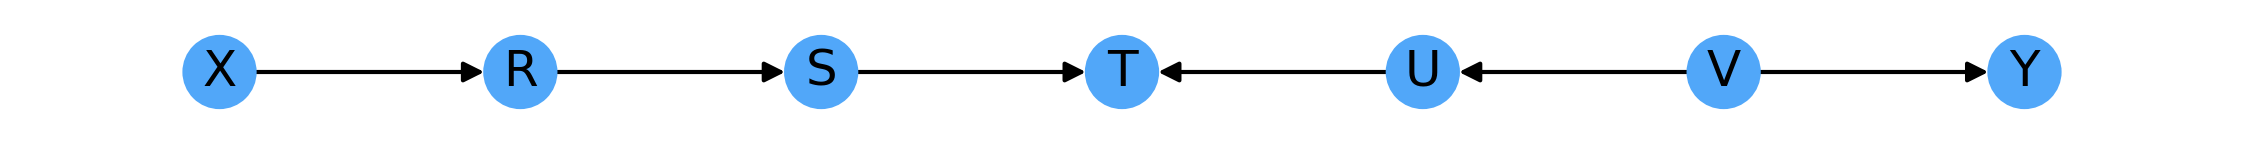

In [ ]:
fig, ax = plt.subplots(1, figsize=(8, 1))
G.plot(ax=ax)

In [ ]:
G.save_model('dags/Primer.Fig.2.5.dot')

In [ ]:
G2 = CausalModel()
G2.add_causation('X', 'R')
G2.add_causation('R', 'S')
G2.add_causation('S', 'T')
G2.add_causation('U', 'T')
G2.add_causation('V', 'U')
G2.add_causation('V', 'Y')
G2.add_causation('T', 'P')

G2.pos = {'X': (0, 0), 'R': (1, 0), 'S':(2, 0), 'T':(3, 0), 'U':(4, 0), 'V': (5, 0), 'Y': (6, 0), 'P': (3, -1)}

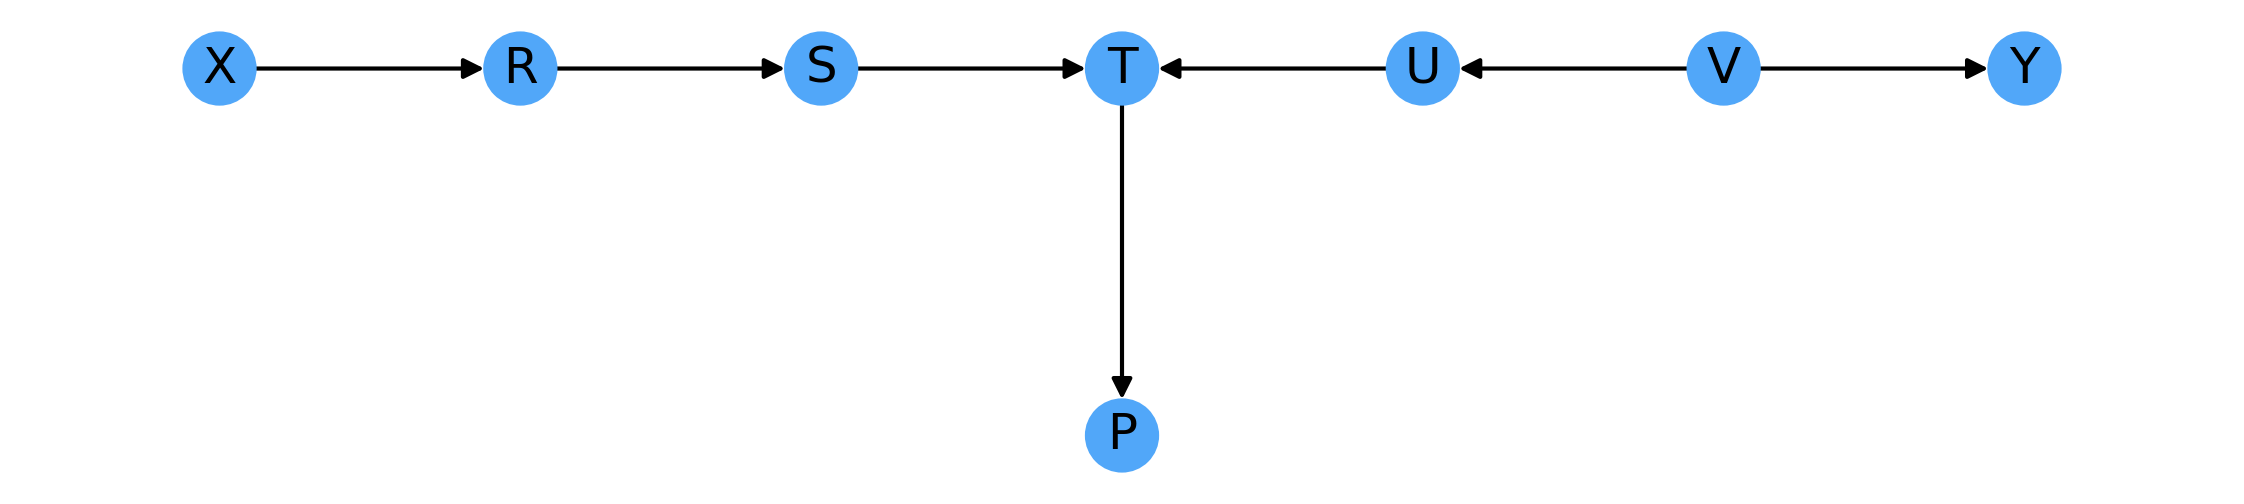

In [ ]:
fig, ax = plt.subplots(1, figsize=(8, 2.2))
G2.plot(ax=ax)

In [ ]:
G2.save_model('dags/Primer.Fig.2.6.dot')

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>